# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [57]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
import scipy as sp
from skimage import io

from skimage import color
from skimage import img_as_float
from matplotlib import cm
from scipy.stats import norm
from skimage import exposure
from skimage import filters
from skimage.filters import rank
from skimage import transform
from skimage import img_as_ubyte

from scipy import signal
from scipy.io import wavfile
from scipy import fftpack



Pretty printing has been turned ON


## 2D - Discrete Fourier Transform
**1.1** Consider a syntetic image as following:

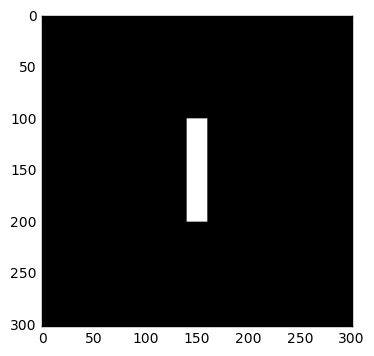

In [58]:
# Create a synthetic image
img = np.zeros((301,301))
# Draw a rectangle inside
img[100:200, 140:160] = 255

plt.figure()
plt.imshow(img, cmap = 'Greys_r')

**1.2** We can compute the FFT as follows:

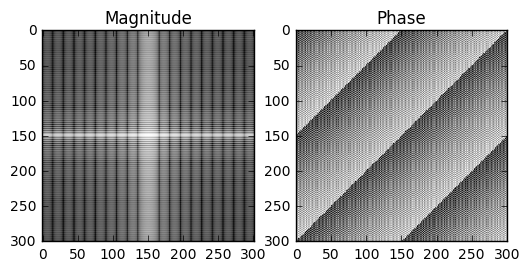

In [59]:
# Compute the DFT
img_freq = np.fft.fftshift(np.fft.fft2(img))

# We can show the magnitude and the phase
# Two subplots, the axes array is 1-d
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(exposure.adjust_log(np.abs(img_freq)), cmap = 'Greys_r')
ax1.set_title('Magnitude')
ax2.imshow(np.angle(img_freq), cmap = 'Greys_r')
ax2.set_title('Phase')


**1.3** Compute the FFT of translated, rotated and other verisons of the synthetic image and illustrate the magnitude and phase of the frequency response. 

Discuss your observations

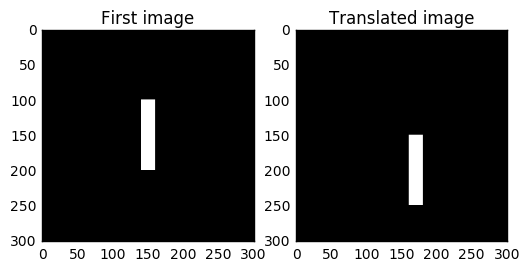

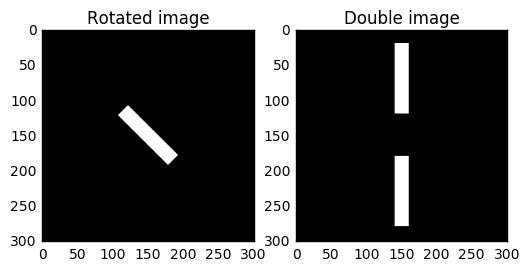

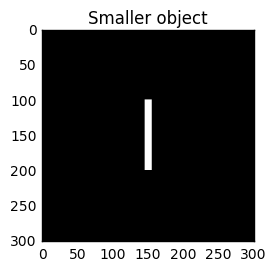

In [60]:
# Create a synthetic image
img = np.zeros((301,301))
# Draw a rectangle inside
img[100:200, 140:160] = 255

# Create a synthetic image
img_trans = np.zeros((301,301))
# Draw a rectangle inside, PLUS TRANSLATION
img_trans[150:250, 160:180] = 255

#Rotated Image (Rotation)
img_rot = transform.rotate(img, 45)

# Create a synthetic image
img2 = np.zeros((301,301))
# Draw a rectangle inside, PLUS DOUBLE IMAGE
img2[20:120, 140:160] = 255
img2[180:280, 140:160] = 255


# Create a synthetic image
img3 = np.zeros((301,301))
# Draw a rectangle inside, PLUS SMALLER OBJECT
img3[100:200, 145:155] = 255

plt.figure
plt.subplot(121)
plt.imshow(img, cmap = 'Greys_r')
plt.title('First image')

plt.subplot(122)
plt.imshow(img_trans, cmap = 'Greys_r')
plt.title('Translated image')
plt.show()

plt.figure()
plt.subplot(121)
plt.imshow(img_rot, cmap = 'Greys_r')
plt.title('Rotated image')

plt.subplot(122)
plt.imshow(img2, cmap = 'Greys_r')
plt.title('Double image')
plt.show()

plt.figure
plt.subplot(121)
plt.imshow(img3, cmap = 'Greys_r')
plt.title('Smaller object')
plt.show()


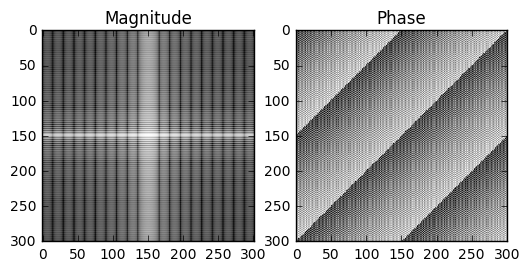

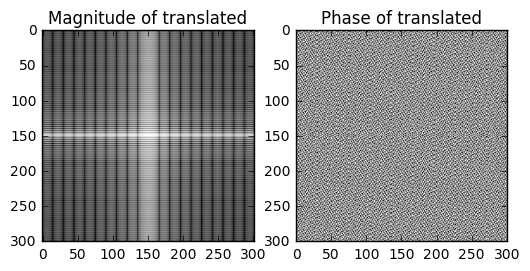

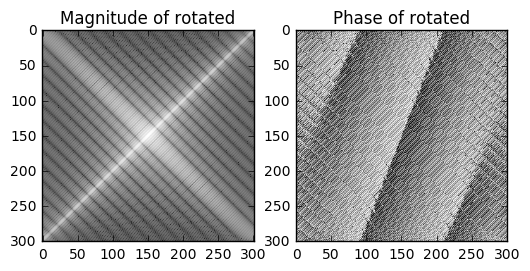

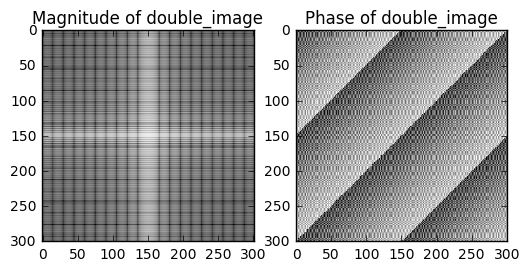

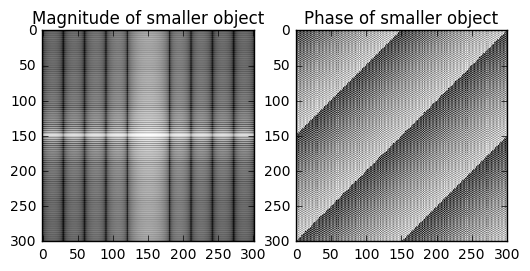

In [61]:
# Compute the DFT
img_freq = np.fft.fftshift(np.fft.fft2(img))

# We can show the magnitude and the phase
# Two subplots, the axes array is 1-d
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(exposure.adjust_log(np.abs(img_freq)), cmap = 'Greys_r')
ax1.set_title('Magnitude')
ax2.imshow(np.angle(img_freq), cmap = 'Greys_r')
ax2.set_title('Phase')

# Compute the DFT of translated image
img_freq_trans = np.fft.fftshift(np.fft.fft2(img_trans))

# We can show the magnitude and the phase
# Two subplots, the axes array is 1-d
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(exposure.adjust_log(np.abs(img_freq_trans)), cmap = 'Greys_r')
ax1.set_title('Magnitude of translated')
ax2.imshow(np.angle(img_freq_trans), cmap = 'Greys_r')
ax2.set_title('Phase of translated')

# Compute the DFT of rotated
img_freq_rot = np.fft.fftshift(np.fft.fft2(img_rot))

# We can show the magnitude and the phase
# Two subplots, the axes array is 1-d
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(exposure.adjust_log(np.abs(img_freq_rot)), cmap = 'Greys_r')
ax1.set_title('Magnitude of rotated')
ax2.imshow(np.angle(img_freq_rot), cmap = 'Greys_r')
ax2.set_title('Phase of rotated')

# Compute the DFT of double image
img_freq_dob = np.fft.fftshift(np.fft.fft2(img2))

# We can show the magnitude and the phase
# Two subplots, the axes array is 1-d
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(exposure.adjust_log(np.abs(img_freq_dob)), cmap = 'Greys_r')
ax1.set_title('Magnitude of double_image')
ax2.imshow(np.angle(img_freq_dob), cmap = 'Greys_r')
ax2.set_title('Phase of double_image')

# Compute the DFT of smaller object
img_freq_small = np.fft.fftshift(np.fft.fft2(img3))

# We can show the magnitude and the phase
# Two subplots, the axes array is 1-d
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(exposure.adjust_log(np.abs(img_freq_small)), cmap = 'Greys_r')
ax1.set_title('Magnitude of smaller object')
ax2.imshow(np.angle(img_freq_small), cmap = 'Greys_r')
ax2.set_title('Phase of smaller object')


**1.4** Lets consider another synthetic image as follows, compute the phase and the magnitude of the followig image and display the normalized center frequency 

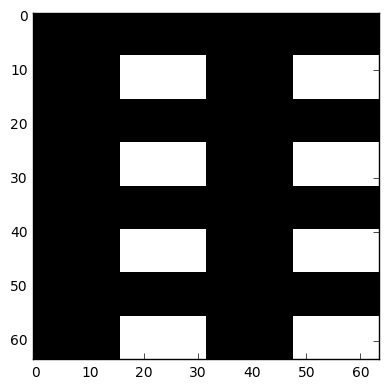

('freq_mag_center_normalized = ', 0.25)


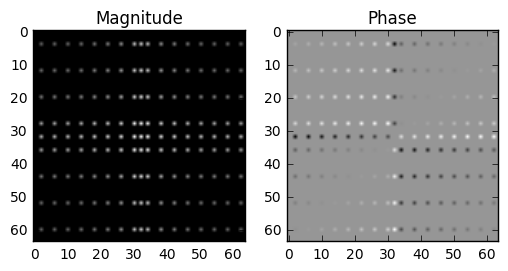

In [62]:
#show magnitude of the transform at the center frequency

N = 64
Img = np.zeros((N,N))
# Length of the signal
T = 1. 
# Sampling period 
Ts = T/N 
Fs = 1./Ts
df = Fs/N
tem = np.ones((8,16))
Img[N/8:N/4, N/4:N/2] = tem 
Img[0:N/4,N/2:] = Img[0:N/4, :N/2]
Img[N/4:N/2,:] = Img[0:N/4 ,:]
Img[N/2:,:] = Img[0:N/2,:]

plt.figure
io.imshow(Img)
plt.show()

# Compute the DFT
img_freq_synIm2 = np.fft.fftshift(np.fft.fft2(Img))

# We can show the magnitude and the phase
# Two subplots, the axes array is 1-d
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(exposure.adjust_log(np.abs(img_freq_synIm2)), cmap = 'Greys_r')
ax1.set_title('Magnitude')
ax2.imshow(np.angle(img_freq_synIm2), cmap = 'Greys_r')
ax2.set_title('Phase')

m, n = img_freq_synIm2.shape
freq_mag_center = np.abs(img_freq_synIm2[m/2][n/2])
normalization_factor = m*n
print('freq_mag_center_normalized = ', freq_mag_center/normalization_factor)

**1.5** Plot $|I_{f}(u,0)|$ and $|I_{f}(0,v)|$ with the corrrect frequency range. 

Discuss your observations.


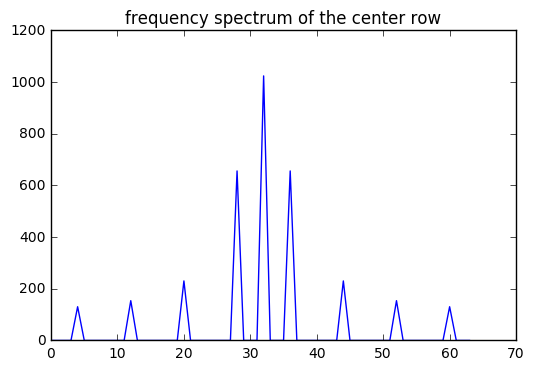

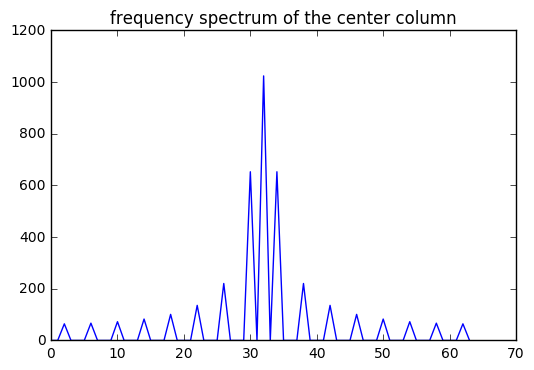

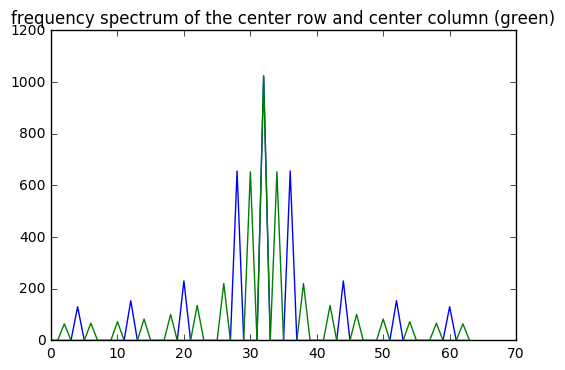

In [63]:
img_freq_synIm2_abs = np.abs(img_freq_synIm2)
ifu0 = img_freq_synIm2_abs[:,m/2]
if0v = img_freq_synIm2_abs[n/2,:]

plt.figure()
plt.plot(ifu0)
plt.title('frequency spectrum of the center row')

plt.figure()
plt.plot(if0v)
plt.title('frequency spectrum of the center column')

plt.figure()
plt.plot(ifu0, 'b')
plt.plot(if0v, 'g')
plt.title('frequency spectrum of the center row and center column (green)')
plt.show()


**1.6** Load the `lena` image, and show its phase and its magnitude, then reconstruct the image using either frequency or phase. 

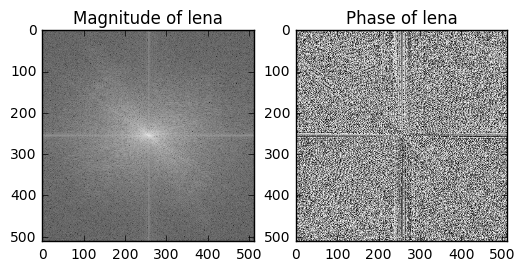

In [64]:
lena_o = io.imread('/home/ghimire/Desktop/DSP-TP-1617/Lab5/images/lena-grey.bmp')
lena = color.rgb2gray(lena_o)

#Compute the DFT
img_freq_lena = np.fft.fft2(lena)
img_freq_lena_shift = np.fft.fftshift(img_freq_lena)

# We can show the magnitude and the phase
# Two subplots, the axes array is 1-d
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(exposure.adjust_log(np.abs(img_freq_lena_shift)), cmap = 'Greys_r')
ax1.set_title('Magnitude of lena')
ax2.imshow(np.angle(img_freq_lena_shift), cmap = 'Greys_r')
ax2.set_title('Phase of lena')


#reconstruction

#with constant phase, original magnitude (constMag) and constant magnitude, original phase (constPhase)
constPhase = np.pi/2
constMag = 2

m, n = np.shape(img_freq_lena)

img_synfreq_mag_lena = img_freq_lena #constant phase image
img_synfreq_ph_lena = img_freq_lena  #constant magnitude image

for row in range(0,m):
    for col in range(0,n):
        mag = np.abs(img_freq_lena[row, col])
        angle = np.angle(img_freq_lena[row, col])
        
        img_synfreq_mag_lena[row,col] = mag*np.cos(constPhase) + mag*np.sin(constPhase)*1j
        img_synfreq_ph_lena[row,col] = constMag*np.cos(angle) + constMag*np.sin(angle)*1j

lena_recon_constphase = np.real(np.fft.ifft2(img_synfreq_mag_lena))
lena_recon_constmag = np.real(np.fft.ifft2(img_synfreq_ph_lena))



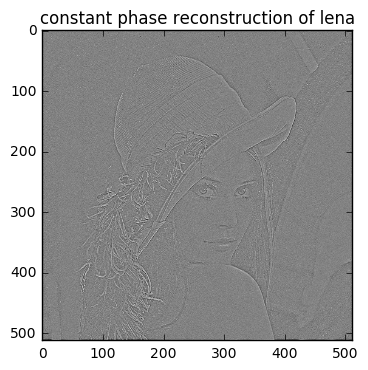

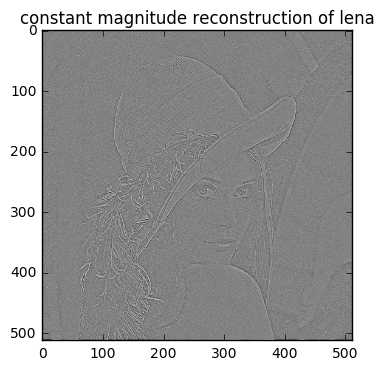

In [65]:
plt.figure()
plt.imshow(lena_recon_constphase, cmap = 'Greys_r')
plt.title('constant phase reconstruction of lena')

plt.figure()
plt.imshow(lena_recon_constmag, cmap = 'Greys_r')
plt.title('constant magnitude reconstruction of lena')

**1.7** Apply the sobel filter only in vertical direction to `lena` image in the frequency domain.

### Filtering in Frequency domain 

In order to build a frequency filter $H(u,v)$ from its spatial counterpart $h(x,y)$, we need to:

1. Build a zero padded spatial filter $h_p(x,y)$
1. Shift $h_p(x,y)$ by $(-1)^{x+y}$
1. Compute the DFT to obtain $H(u,v)$
1. Shift $H(u,v)$ by $(-1)^{x+y}$

In order to aboid the wraparound error, the image need to be zero padded

In order to perform the filtering, we need to:

1. Find the padded image size
1. Pad the image
1. Convert the spatial filter to frequency filter
1. Compute the DFT of the image with additional shift
1. Apply the multiplication in the Fourier space
1. Compute the inverse Fourier transform
1. Crop the image at its original size

In [66]:
#returns the power of 2 that is >= n
def next2pow(n):
    guess = 0
    while (2**guess < n):
        guess = guess + 1
        
    return (2**guess)

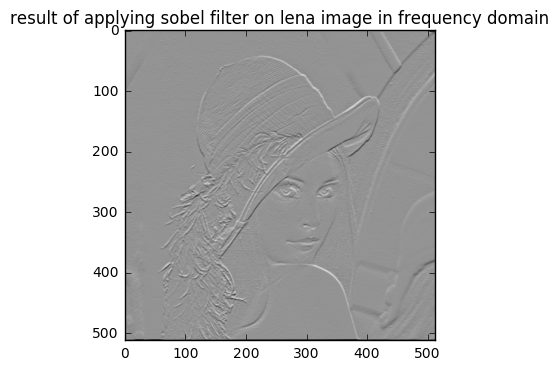

In [67]:
#enter the sobel kernel; the following only works for a square kernel
h = np.array([ [1,2,1], [0,0,0], [-1,-2,-1] ])

#compute p and q for zero padding
mh, nh = h.shape
ml, nl = lena.shape

p = next2pow(ml + mh -1)
q = next2pow(nl + nh - 1)

#zero pad the lena image
lena_padded = np.zeros((p,q))
lena_padded[0:ml, 0:nl] = lena

#zero pad the kernel
h_padded = np.zeros((p,q))
r = (mh - 1)/2 
h_padded[p/2-r:p/2+r+1, q/2-r:q/2+r+1] = h

#compute the ffts of padded image and padded kernel
lena_fft = np.fft.fft2(lena_padded)
h_fft = np.fft.fft2(h_padded)
out_fft = np.multiply(lena_fft, h_fft)

out = np.real(np.fft.ifft2(out_fft))

mo, no = out.shape
out_lena = out[mo-ml:mo, no-nl:no]

plt.figure()
plt.imshow(out_lena, cmap = 'Greys_r')
plt.title('result of applying sobel filter on lena image in frequency domain')
